In [11]:
import pandas as pd

In [23]:
# Steps to make tweet.csv to a proper dataframe

df = pd.read_csv("tweets.csv")
cols = df.columns[0].split(",")
df = df.iloc[:,0].str.split(',', expand=True)
df.columns = cols
df.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,LOSER! https://t.co/p5imhMJqS1,05-18-2020 14:55:14,32295,135445,false,1262396333064892416
1,Twitter for iPhone,Most of the money raised by the RINO losers of...,05-05-2020 18:18:26,19706,82425,false,1257736426206031874
2,Twitter for iPhone,....because they don’t know how to win and the...,05-05-2020 04:46:34,12665,56868,false,1257532112233803782
3,Twitter for iPhone,....lost for Evan “McMuffin” McMullin (to me)....,05-05-2020 04:46:34,13855,62268,false,1257532114666508291
4,Twitter for iPhone,....get even for all of their many failures. Y...,05-05-2020 04:46:33,8122,33261,false,1257532110971318274


In [46]:
# Importing Libraries

import re
import unicodedata
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [25]:
# adding extra words to stopwords list. This will help to remove words which are not in stop word list.

ADDITIONAL_STOPWORDS = ['covfefe']

In [37]:
# Download wordnet for lemmatizing.

import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [73]:
'''
unicodedata.normalize('NFKD') - NFKD stands for "Normalization Form Compatibility Decomposition." It is one of the Unicode normalization forms
                                used to transform Unicode text into a standardized representation. Unicode normalization is a
                                process of transforming text that may have multiple representations into a standardized or canonical
                                form.

.encode('ascii', 'ignore') - This part encodes the normalized Unicode string into ASCII, ignoring any characters that cannot be
                             represented in ASCII. This is a common technique to handle non-ASCII characters.

.decode('utf-8', 'ignore') - The encoded ASCII string is then decoded back to UTF-8, ignoring any decoding errors. This step ensures
                             that the resulting string is in UTF-8 format.

.lower() - Finally, the entire string is converted to lowercase using the lower() method. This is a standard step in text
           preprocessing to ensure case consistency

words = re.sub(r'[^\w\s]', '', text).split() - capture everything that is not a word or a space and convert them to ''

wnl.lemmatize(word) for word in words if word not in stopwords - lemmatize the words which are not in the stopwords to its root form
'''

def basic_clean(text):
  """A simple function to clean up the data. All the words that are not designated as a stop word is then lemmatized after encoding
     and basic regex parsing are performed.
  """
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [79]:
words = basic_clean(''.join(str(df['text'].tolist())))

In [80]:
words[:20]

['loser',
 'httpstcop5imhmjqs1',
 'money',
 'raised',
 'rino',
 'loser',
 'socalled',
 'lincoln',
 'project',
 'go',
 'pocket',
 'ive',
 'done',
 'judge',
 'tax',
 'regulation',
 'healthcare',
 'military',
 'vet',
 'choice']

In [76]:
# Top 10 bigrams from the text

(pd.Series(nltk.ngrams(words, 2)).value_counts())[:10]

(hater, loser)        42
(total, loser)        33
(loser, hater)        14
(amp, loser)          13
(donald, trump)       11
(hater, amp)          11
(separate, winner)     8
(winner, loser)        8
(loser, like)          6
(wear, wig)            6
dtype: int64

In [77]:
# Top 10 trigrams from the text

(pd.Series(nltk.ngrams(words, 3)).value_counts())[:10]

(hater, amp, loser)             10
(separate, winner, loser)        8
(reacts, new, twist)             6
(hater, loser, happy)            6
(new, twist, fate)               6
(person, reacts, new)            6
(loser, person, reacts)          6
(winner, loser, person)          6
(including, hater, loser)        5
(everyone, including, hater)     5
dtype: int64

In [43]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:12]
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:12]

<Axes: >

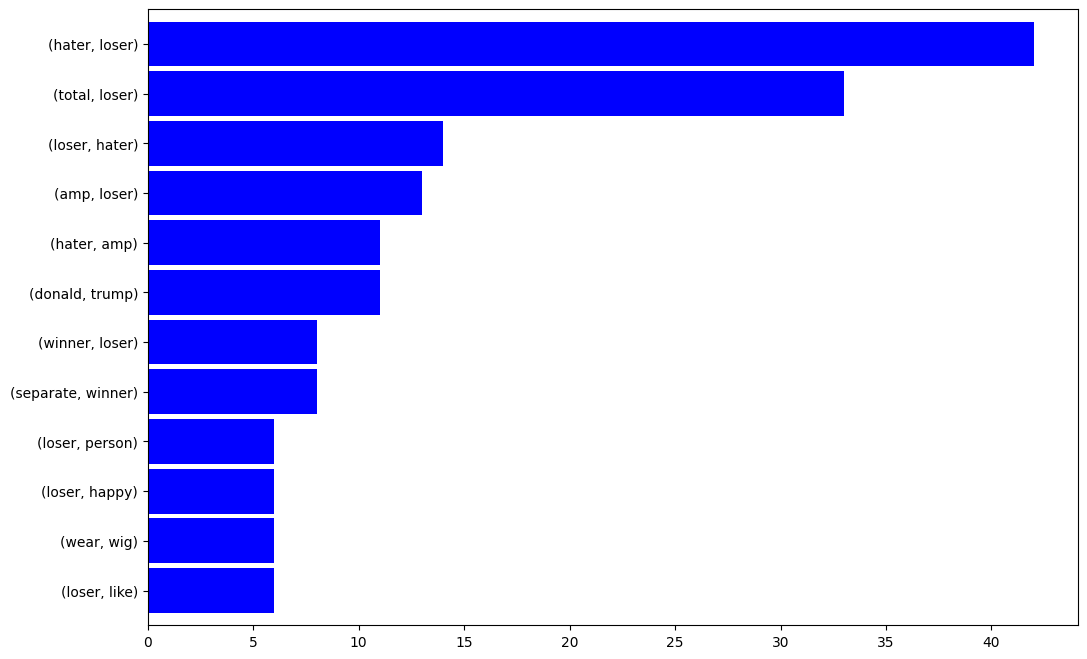

In [81]:
# Sorting the count and ploting the bigrams

bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

Text(0.5, 0, '# of Occurances')

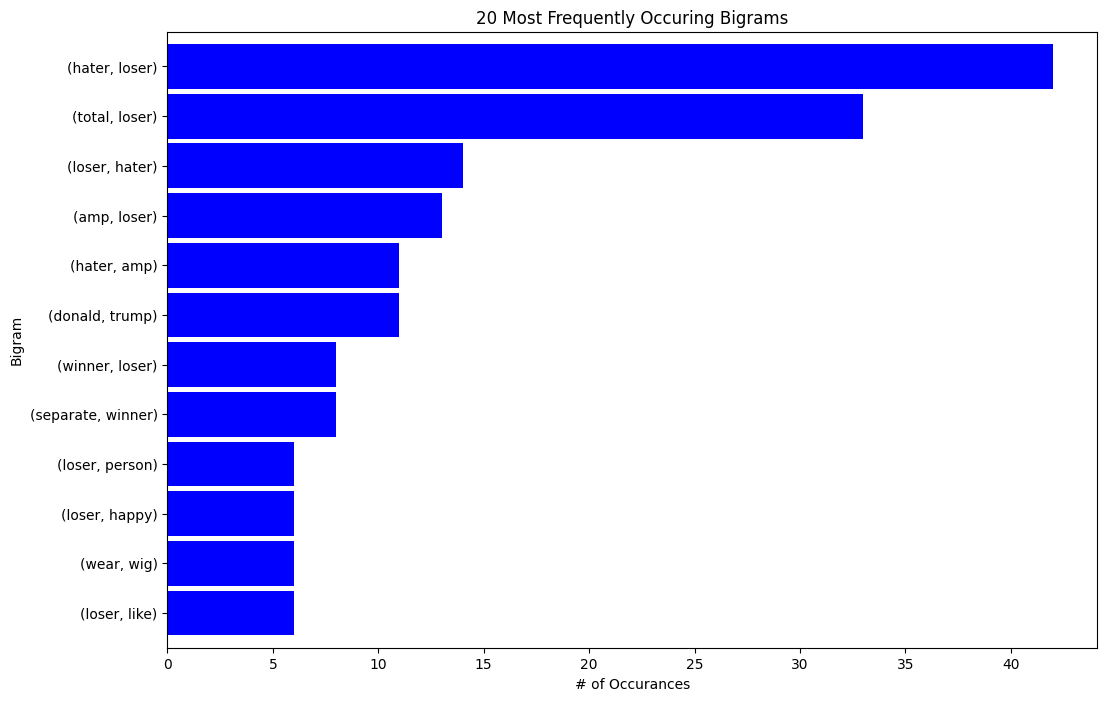

In [45]:
# Sorting the count and ploting the bigrams with title, xlabel and ylabel.

bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')